# Nithya Ramesh

# Data Science and Business Analytics intern
# @The Sparks Foundation(TSF)

# Task 8 (Timeline Analysis : Covid-19)

#### Showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc) 
#### Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts

### COVID-19 is the disease caused by a new coronavirus called SARS-CoV-2.  WHO first learned of this new virus on 31 December 2019, following a report of a cluster of cases of ‘viral pneumonia’ in Wuhan, People’s Republic of China.
### The most common symptoms of COVID-19 are Fever,Dry cough and Fatigue.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

#### Reading and Checking Dataset

In [2]:
data = pd.read_csv('owid-covid-data.csv');
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75265,ZWE,Africa,Zimbabwe,2021-03-12,36423.0,46.0,25.000,1496.0,4.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75266,ZWE,Africa,Zimbabwe,2021-03-13,36471.0,48.0,30.143,1501.0,5.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75267,ZWE,Africa,Zimbabwe,2021-03-14,36484.0,13.0,30.429,1503.0,2.0,2.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
75268,ZWE,Africa,Zimbabwe,2021-03-15,36504.0,20.0,30.714,1504.0,1.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [3]:
data.shape

(75270, 59)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75270 entries, 0 to 75269
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               75270 non-null  object 
 1   continent                              71564 non-null  object 
 2   location                               75270 non-null  object 
 3   date                                   75270 non-null  object 
 4   total_cases                            74117 non-null  float64
 5   new_cases                              74115 non-null  float64
 6   new_cases_smoothed                     73114 non-null  float64
 7   total_deaths                           64868 non-null  float64
 8   new_deaths                             65026 non-null  float64
 9   new_deaths_smoothed                    73114 non-null  float64
 10  total_cases_per_million                73713 non-null  float64
 11  ne

In [5]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

#### Statistical Information of the dataframe

In [6]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.411700e+04,74115.000000,73114.000000,6.486800e+04,65026.000000,73114.000000,73713.000000,73711.000000,72715.000000,64477.000000,...,68561.000000,46779.000000,69182.000000,70069.000000,54364.000000,53617.000000,34732.000000,63303.000000,71513.000000,69126.000000
mean,6.621421e+05,5180.588140,5194.484386,1.952829e+04,132.131440,116.426386,7871.576376,67.241941,67.146024,184.520158,...,19147.774742,13.287071,257.278201,7.799084,10.548460,32.648507,50.995658,3.035601,73.141167,0.727805
std,4.648450e+06,32316.545929,32035.996579,1.143943e+05,723.115918,661.294919,15469.463047,169.007211,142.340191,328.007777,...,19746.043711,19.924632,118.491629,3.943032,10.409634,13.466826,31.767475,2.467026,7.552271,0.150155
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.260000e+02,2.000000,6.000000,3.800000e+01,0.000000,0.000000,152.481000,0.143500,1.013000,5.716000,...,4466.507000,0.500000,167.295000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.602000
50%,8.225000e+03,60.000000,72.785500,2.550000e+02,2.000000,1.000000,1096.212000,6.457000,8.605000,31.690000,...,12951.839000,2.000000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.530000,0.748000
75%,8.846000e+04,678.000000,703.429000,2.429250e+03,16.000000,12.286000,7331.940000,57.781000,65.084500,196.959000,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,4.000000,78.730000,0.848000
max,1.206958e+08,880902.000000,739564.429000,2.670453e+06,17895.000000,14424.000000,146495.826000,8652.658000,2648.773000,2268.843000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.957000


In [7]:
data.nunique()

iso_code                                   215
continent                                    6
location                                   215
date                                       441
total_cases                              39135
new_cases                                10328
new_cases_smoothed                       19669
total_deaths                             14862
new_deaths                                2501
new_deaths_smoothed                       5601
total_cases_per_million                  56900
new_cases_per_million                    32611
new_cases_smoothed_per_million           36659
total_deaths_per_million                 34582
new_deaths_per_million                    6464
new_deaths_smoothed_per_million           7676
reproduction_rate                          357
icu_patients                              2021
icu_patients_per_million                  4284
hosp_patients                             4032
hosp_patients_per_million                 6994
weekly_icu_ad

In [8]:
data.isnull().sum()

iso_code                                     0
continent                                 3706
location                                     0
date                                         0
total_cases                               1153
new_cases                                 1155
new_cases_smoothed                        2156
total_deaths                             10402
new_deaths                               10244
new_deaths_smoothed                       2156
total_cases_per_million                   1557
new_cases_per_million                     1559
new_cases_smoothed_per_million            2555
total_deaths_per_million                 10793
new_deaths_per_million                   10635
new_deaths_smoothed_per_million           2555
reproduction_rate                        14700
icu_patients                             67511
icu_patients_per_million                 67511
hosp_patients                            65933
hosp_patients_per_million                65933
weekly_icu_ad

In [9]:
data.continent.value_counts()

Africa           19760
Europe           18188
Asia             17981
North America     8881
South America     4584
Oceania           2170
Name: continent, dtype: int64

#### Analyzing worldwide cases

In [10]:
dataset = data[data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
663,OWID_AFR,NaN,Africa,2020-11-15,1976022.0,12570.0,13308.857,47362.0,296.0,286.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1435,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
1815,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2177,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
2569,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.778
3010,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845
3391,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
3811,OWID_ASI,NaN,Asia,2020-11-15,15118723.0,81910.0,93796.714,266621.0,1463.0,1556.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data["location"].value_counts()

Mexico              441
Argentina           441
Thailand            438
Taiwan              426
South Korea         421
                   ... 
Anguilla             23
Montserrat           16
Falkland Islands     16
Northern Cyprus       9
Saint Helena          1
Name: location, Length: 215, dtype: int64

#### India's covid cases

In [12]:
india=data[data["location"]=="India"]

In [13]:
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
30923,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30924,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30925,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30926,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30927,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


#### Data Visualization of India's covid cases

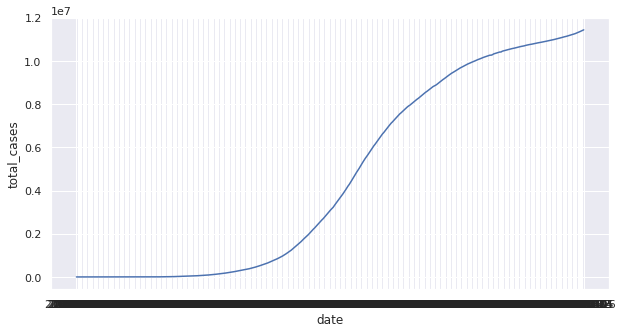

In [14]:
sns.set(rc={"figure.figsize":(10,5)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

#### Data Visualization of India's last five days covid cases

In [15]:
india_last_5_days=india.tail()

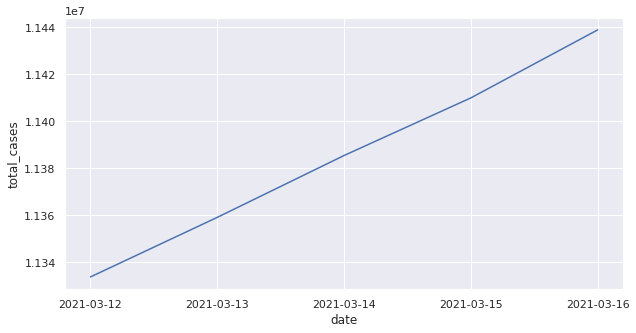

In [16]:
sns.set(rc={"figure.figsize":(10,5)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

#### Total test per day

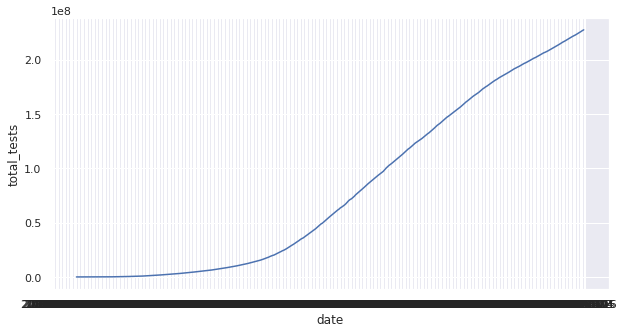

In [17]:
sns.set(rc={"figure.figsize":(10,5)})
sns.lineplot(x="date",y="total_tests",data=india)
plt.show()

#### Total test last 5 days

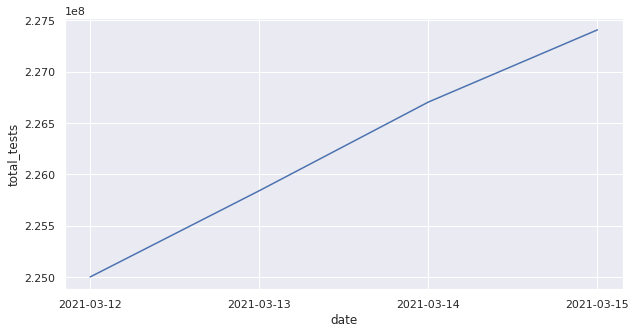

In [18]:
sns.set(rc={"figure.figsize":(10,5)})
sns.lineplot(x="date",y="total_tests",data=india_last_5_days)
plt.show()

#### Russial's covid cases

In [19]:
Russia=data[data["location"]=="Russia"]

In [20]:
Russia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
55712,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
55713,RUS,Europe,Russia,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
55714,RUS,Europe,Russia,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
55715,RUS,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
55716,RUS,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [21]:
Russia.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56118,RUS,Europe,Russia,2021-03-12,4321588.0,9695.0,9816.000,89701.0,477.0,411.429,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
56119,RUS,Europe,Russia,2021-03-13,4331396.0,9808.0,9658.714,90169.0,468.0,416.571,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
56120,RUS,Europe,Russia,2021-03-14,4341381.0,9985.0,9588.286,90558.0,389.0,420.571,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
56121,RUS,Europe,Russia,2021-03-15,4350728.0,9347.0,9474.286,90958.0,400.0,424.714,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
56122,RUS,Europe,Russia,2021-03-16,4360033.0,9305.0,9469.000,91395.0,437.0,440.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


#### Data Visualization of Russia's last five days covid cases

In [22]:
Russia_last_5_days=Russia.tail()

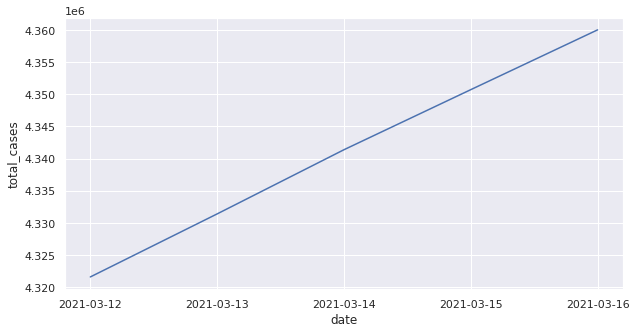

In [23]:
sns.set(rc={"figure.figsize":(10,5)})
sns.lineplot(x="date",y="total_cases",data=Russia_last_5_days)
plt.show()

#### cases of india,china and japan

In [24]:
india_china_japan=data[(data["location"]=="India") | (data["location"]=="China") | (data["location"]=="Japan")]

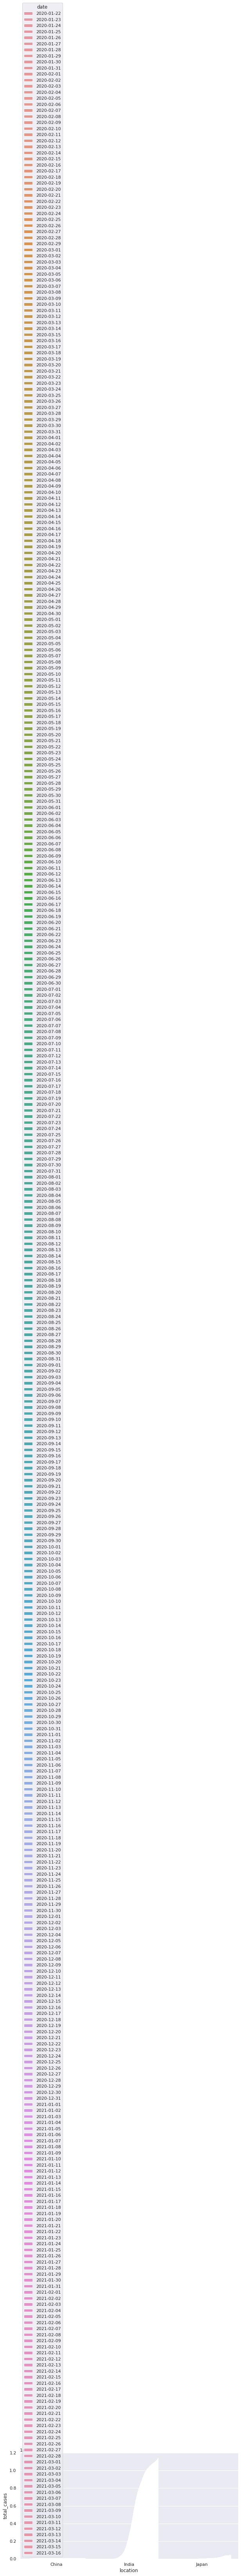

In [25]:
sns.set(rc={"figure.figsize":(10,5)})
sns.barplot(x="location",y="total_cases",data=india_china_japan,hue="date")
plt.show()

#### cases of germany and spain

In [26]:

germany_spain=data[(data["location"]=="Germany") | (data["location"]=="Spain")]

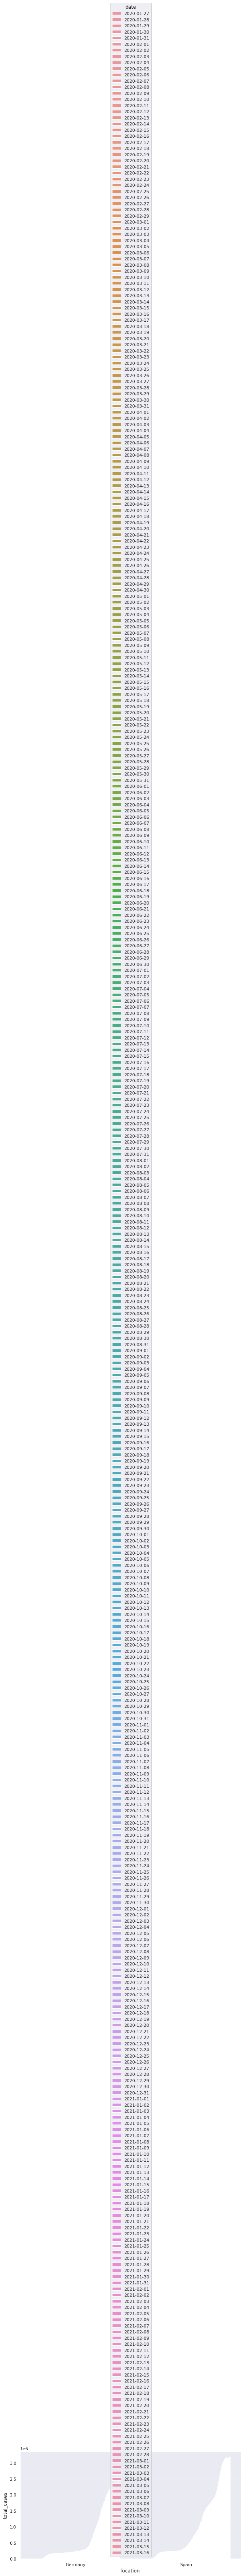

In [27]:
sns.set(rc={"figure.figsize":(10,5)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()

#### Getting latest data

In [28]:
last_day_cases=data[(data["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511
696,OWID_AFR,NaN,Africa,2020-12-18,2469647.0,19320.0,17818.286,58310.0,496.0,378.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795
1468,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748
1848,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73694,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704
74114,OWID_WRL,NaN,World,2020-12-18,75789167.0,720155.0,645815.571,1679958.0,12762.0,11570.571,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
74455,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470
74819,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584


#### sorting date w.r.t to total cases

In [29]:
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74114,OWID_WRL,NaN,World,2020-12-18,75789167.0,720155.0,645815.571,1679958.0,12762.0,11570.571,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
23235,OWID_EUR,NaN,Europe,2020-12-18,21074550.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49846,OWID_NAM,NaN,North America,2020-12-18,20250911.0,277232.0,243844.000,467819.0,3906.0,3527.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3844,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71668,USA,North America,United States,2020-12-18,17574674.0,251935.0,221037.429,318334.0,2940.0,2708.571,...,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72907,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
61571,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,...,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.567
42907,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,NaN,NaN,0.000,...,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.704
57615,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,NaN,NaN,0.000,...,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715


#### Top 3 countries with maximum case

In [30]:
max_cases_country[1:4]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
23235,OWID_EUR,NaN,Europe,2020-12-18,21074550.0,244541.0,212044.714,486362.0,5713.0,4998.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49846,OWID_NAM,NaN,North America,2020-12-18,20250911.0,277232.0,243844.000,467819.0,3906.0,3527.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3844,OWID_ASI,NaN,Asia,2020-12-18,19629928.0,100404.0,102874.429,319870.0,1371.0,1446.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Bar plot of top 3 countries with maximum case

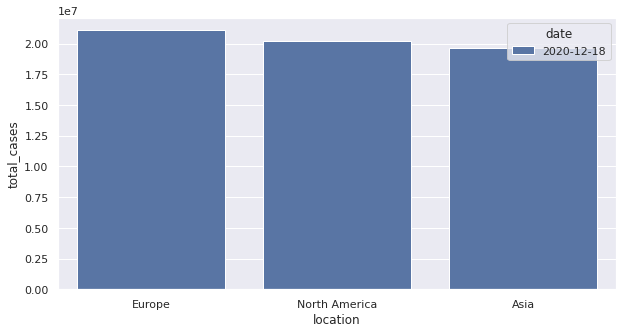

In [31]:
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:4],hue="date")
plt.show()

# What should we do if we have covid-19 symptoms?
#### If you have any symptoms suggestive of COVID-19, call your health care provider or COVID-19 hotline for instructions and find out when and where to get a test, stay at home for 14 days away from others and monitor your health.

#### If you have shortness of breath or pain or pressure in the chest, seek medical attention at a health facility immediately. Call your health care provider or hotline in advance for direction to the right health facility.

#### If you live in an area with malaria or dengue fever, seek medical care if you have a fever.

#### If local guidance recommends visiting a medical centre for testing, assessment or isolation, wear a medical mask while travelling to and from the facility and during medical care. Also keep at least a 1-metre distance from other people and avoid touching surfaces with your hands.  This applies to adults and children.

#### Thank You